# Scenario-2: Gnar Automobiles
Gnar Automobiles engages in the distribution and sale of automobiles and light commercial vehicles. The owner of the Gnar Automobiles deals with a number of distributors across countries in different origins.
### Problem Statement:

As every orgin sends cars with various specifications. The owner wants to determine the origin of the cars based on the specifications of the cars to further increase business opportunities

#### Dataset Description
"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." Attribute Information:

• mpg: continuous

• cylinders:- multi-valued discrete

• displacement:- continuous

• horsepower:- continuous

• weight:- continuous

• acceleration:- continuous

• model year:- multi-valued discrete

• origin:- multi-valued discrete

• car name:- string (unique for each instance)

#### Tasks to be Performed:

In order to attain the above goal below tasks must be performed:

• Read the dataset and process the missing values in each column. Use pandas_profiling to get a report of the data. - Beginner

• Scale the data using MinMaxScaler and plot the boxplot before and after scaling the data. - Beginner

• Explore the data relations with target variable origin. - Intermediate

• Split the data into training and testing set and apply KNN model with k=3,9,12.-Intermediate 

• Evaluate the model and find the accuracy score. - Intermediate

• Plot the visualizations for the models. - Advanced

#### Topics Covered:

• K-Nearest Neighbor

#### Importing required Libraries

In [11]:
!pip install mlxtend

  Using cached mlxtend-0.21.0-py2.py3-none-any.whl (1.3 MB)


In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions 
%matplotlib inline

### Question-1: Read the dataset and process the missing values in each column. Use pandas_profiling to get a report of the data.

In [2]:
data = pd.read_csv('auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
data.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,NaN


In [4]:
miss=pd.DataFrame({'Col_name':data.columns, 'Missing value?':
                            [any(data[x].isnull()) for x in data.columns],
                  'Count_' :[sum(data[y].isnull()) for y in data.columns],
                            'Percentage':[sum(data[y].isnull())/data.shape[0] for y in data.columns]})

miss.sort_values(by='Count_', ascending=False)

,Col_name,Missing value?,Count_,Percentage
3,horsepower,True,6,0.015075
0,mpg,False,0,0.000000
1,cylinders,False,0,0.000000
2,displacement,False,0,0.000000
4,weight,False,0,0.000000
5,acceleration,False,0,0.000000
6,model year,False,0,0.000000
7,origin,False,0,0.000000
8,car name,False,0,0.000000


In [5]:
print("Total Missing Values: %s"%sum(miss.Count_))

Total Missing Values: 6


In [6]:
data.horsepower=data.horsepower.fillna(data.horsepower.mean())

In [7]:
miss=pd.DataFrame({'Col_name':data.columns, 'Missing value?':
                            [any(data[x].isnull()) for x in data.columns],
                  'Count_' :[sum(data[y].isnull()) for y in data.columns],
                            'Percentage':[sum(data[y].isnull())/data.shape[0] for y in data.columns]})

miss.sort_values(by='Count_', ascending=False)

,Col_name,Missing value?,Count_,Percentage
0,mpg,False,0,0.0
1,cylinders,False,0,0.0
2,displacement,False,0,0.0
3,horsepower,False,0,0.0
4,weight,False,0,0.0
5,acceleration,False,0,0.0
6,model year,False,0,0.0
7,origin,False,0,0.0
8,car name,False,0,0.0


In [8]:
import pandas_profiling
import warnings
warnings. filterwarnings("ignore")

In [27]:
rpt=pandas_profiling.ProfileReport(data)

In [28]:
rpt

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

ImportError: cannot import name 'ABCIndexClass' from 'pandas.core.dtypes.generic' (C:\Users\jack\anaconda3\lib\site-packages\pandas\core\dtypes\generic.py)

### Question-2: Scale the data using MinMaxScaler and plot the boxplot before and after scaling the data.

In [9]:
feat=data.columns
feat=feat.drop(['car name','origin'])

• IQR Score: Measure of spread, IQR = Q3-Q1

In [10]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

mpg               11.50
cylinders          4.00
displacement     157.75
horsepower        49.00
weight          1384.25
acceleration       3.35
model year         6.00
origin             1.00
dtype: float64


In [11]:
data_o=data[~((data < (Q1 - 1.5*IQR))|(data > (Q3+ 1.5*IQR))).any(axis=1)]

In [12]:
X=data_o.drop(['car name', 'origin'], axis=1) 
y=data_o.origin

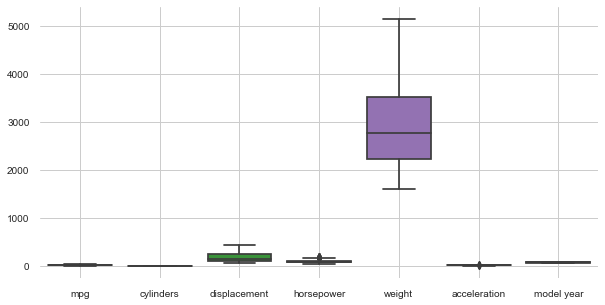

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5)) 
sns.boxplot(data=X) 
plt.xticks(ticks=np.arange(len(feat)), labels=feat) 
plt.grid()
plt.show()

In [14]:
# Scaling data after outlier removal
scl=MinMaxScaler()

In [15]:
X=scl.fit_transform(X)

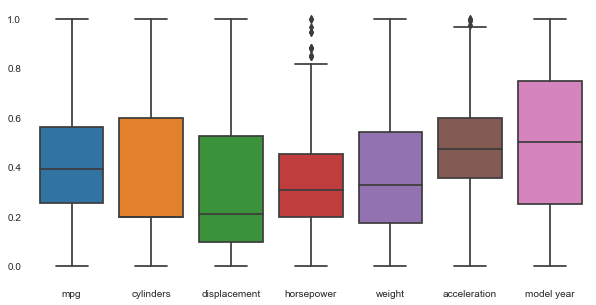

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(data=X)
plt.xticks(ticks=np.arange(len(feat)),labels=feat)
plt.show()

### Question:-3 Explore the data reations with target variable origin.

In [17]:
Target_ratio=y.value_counts()/len(y)
print(Target_ratio)

1    0.621053
3    0.205263
2    0.173684
Name: origin, dtype: float64


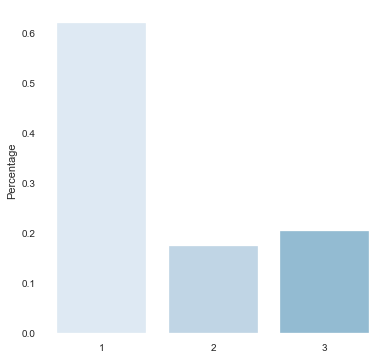

In [18]:
## Checking for data unbalance
plt.figure(figsize=(6,6))
sns.set_palette(sns.color_palette("Blues"))
sns.barplot(Target_ratio.index, Target_ratio,)
plt.ylabel('Percentage')
plt.show()

In [19]:
data_o.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [35]:
def format_text(size,color,weight='normal'):
    return{'size':size, 'color':'#'+color, 'weight':weight}

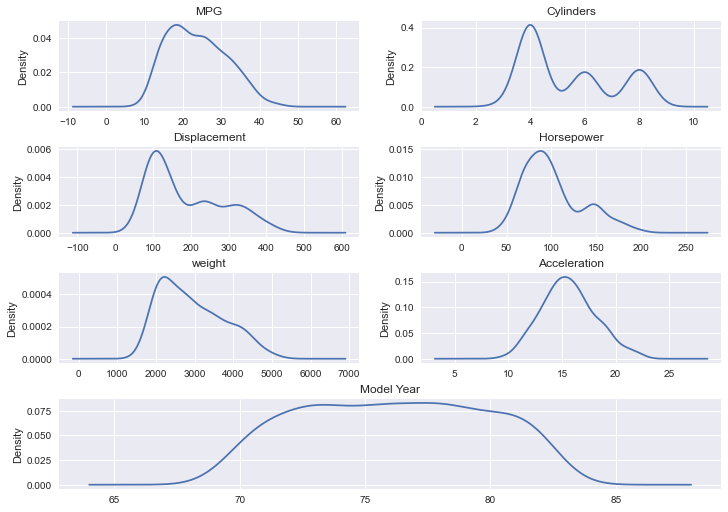

In [41]:
# KDE Plots

from matplotlib.gridspec import GridSpec 
plt.style.use('seaborn')
fig=plt.figure(figsize=(10,7), constrained_layout=True)
gs=GridSpec(4, 2, figure=fig)
ax1=fig.add_subplot(gs[0, 0])
data_o.mpg.plot.kde()
ax1.set_title('MPG')#,**Format_text(12,'#5e60ce'))

ax2=fig.add_subplot(gs[0,1]) 
data_o.cylinders.plot.kde()
ax2.set_title('Cylinders')#,**format_text(12,'#5e60ce'))

ax3=fig.add_subplot(gs[1,0])
data_o.displacement.plot.kde() 
ax3.set_title('Displacement')#,**format_text(12,'#5390d9'))

ax4=fig.add_subplot(gs[1,1])
data_o.horsepower.plot.kde()
ax4.set_title('Horsepower')#,**format_text(12,'#48bfe3'))

ax5=fig.add_subplot(gs[2,0])
data_o.weight.plot.kde()
ax5.set_title('weight')#,**format_text(12,'#64dfdf'))

ax6=fig.add_subplot(gs[2,1])
data_o.acceleration.plot.kde()
ax6.set_title('Acceleration')#,**format_text(12,'#80ffdb'))

ax7=fig.add_subplot(gs[3,:])
data_o['model year'].plot.kde() 
ax7.set_title('Model Year')#,**format_text(12, '#95d5b2'))
plt.show()                       

From the above plot we can see that data is not normal in nature.

In [ ]:
sns.set_palette(sns.color_palette('hls'))
fig, ax=plt.subplots(3,3, figsize=(15,10)) 
col=data.columns
q=0
plt.style.use('ggplot')
for i in ax:
    for j in i:
        for grp, tata in data.groupby('origin'):
            j.set_title(col[q])
            j.plot(sorted (tata[col[q]]))
            j.legend (np.arange(3)+1)
        if q==6:
            break
        q+=1

From the above data we can clearly see that origin 1 has high stats for every feature while 3 and 2 have pretty low stats.

In [ ]:
# Pairplots
plt.style.use('fast')
sns.set_palette(sns.color_palette('autumn'))
pd.plotting.scatter_matrix(data_o, figsize=(12,12), marker='o', hist_kwds={'bins': 10}, alpha = 0.8) 
plt.show()

With the above graph, we can see the distribution of features as well as the relation between them. From the above graph, we can see that the weight is proportional to displacement and horsepower but inversely proportional with mpg. We can derive that the data is left skewed from the above graph.

### Question-4: Apply KNN model with k=3,9,12.

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score 
from sklearn.metrics import classification_report, f1_score 

In [23]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0, test_size=0.3)

In [24]:
knn9=KNeighborsClassifier(n_neighbors=9)
knn12=KNeighborsClassifier(n_neighbors=12) 
knn3=KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train,y_train)
knn12.fit(X_train,y_train) 
knn9.fit(X_train,y_train)
knn3_pred=knn3.predict(X_test)
knn12_pred=knn12.predict(X_test) 
knn9_pred=knn9.predict(X_test)


In [25]:
print('Accuracy score when k-3:',accuracy_score(y_test,knn3_pred)*100) 
print('Accuracy score when k-9:',accuracy_score(y_test, knn9_pred)*100)
print('Accuracy score when k-12:',accuracy_score(y_test,knn12_pred)*100)

Accuracy score when k-3: 65.78947368421053
Accuracy score when k-9: 72.80701754385966
Accuracy score when k-12: 69.2982456140351


In [26]:
#Lets see precision and recall values
#Insert data in evaluation dictionary
def initialize_evaluator():
    return {'Model':[], 'Accuracy': [], 'Precision': [], 'Recall' : [], 'F1_score':[]}
def insert_data_k(test,pred,model,average):
    eval_data=initialize_evaluator()
    eval_data['Model'].append(model)
    eval_data['Accuracy'].append(accuracy_score(test, pred))
    eval_data['Precision'].append(precision_score(test, pred,average=average))
    eval_data['Recall'].append(recall_score(test, pred,average=average)) 
    eval_data['F1_score'].append(f1_score(test, pred,average=average)) 
    return eval_data

In [27]:
# Check prcision score from sklearn to Learn more about average 
eval3=insert_data_k(y_test,knn3_pred,'KNN3 Model','weighted') 
eval9=insert_data_k(y_test,knn9_pred,'KNN9 Model','weighted') 
eval12=insert_data_k(y_test,knn12_pred,'KNN12 Model','weighted')

In [28]:
#Append data of one dictionary to another
def append_data(data1, data2): 
    for i in data1.keys(): 
        data2[i].extend(data1[i]) 
    return data2

In [29]:
eval_knn=append_data(eval3,eval9) 
eval_knn=append_data(eval12,eval_knn)

In [30]:
from matplotlib.gridspec import GridSpec
def plot_models(data):
    sns.set_palette(sns.color_palette("rocket")) 
    super_title={'size':18, 'color':'#c5283d','weight':'bold'}
    sub_title={'size':12, 'color': '#e06777', 'weight':'bold'}
    colors=np.array([[156, 137, 184], [239, 195, 238], [184, 190, 221],[231, 115, 171]]) 
    colors=colors/255 #Matplotlib RGB color range is from 0-1
    data=pd.DataFrame(data)
    fig=plt.figure(figsize=(10,7),constrained_layout=True)
    gs=GridSpec(2, 2, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.barh(data.Model,data.Accuracy,color=colors) 
    ax1.tick_params(labelbottom=False, labelleft=True)
    ax1.set_xlim(0,1)
    ax1.set_title('Accuracy',**sub_title)
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.barh(data.Model,data.Precision,color=colors) 
    ax2.tick_params(labelbottom=False, labelleft=False)
    ax2.set_xlim(0,1)
    ax2.set_title('Precision',**sub_title) 
    ax3 = fig.add_subplot(gs[1, 0])
    ax3.barh(data.Model,data.Recall,color=colors)
    ax3.tick_params(labelbottom=True, labelleft=True)
    ax3.set_xlim(0,1)
    ax3.set_title('Recall',**sub_title)
    ax4 = fig.add_subplot(gs[1, 1])
    ax4.barh(data.Model,data.F1_score,color=colors) 
    ax4.tick_params(labelbottom=False, labelleft=False)
    ax4.set_xlim(0,1)
    ax4.set_title('F1_Score',**sub_title)
    fig.suptitle("Evaluation",**super_title)
    ax4.tick_params(labelbottom=True, labelleft=False)
    plt.show()

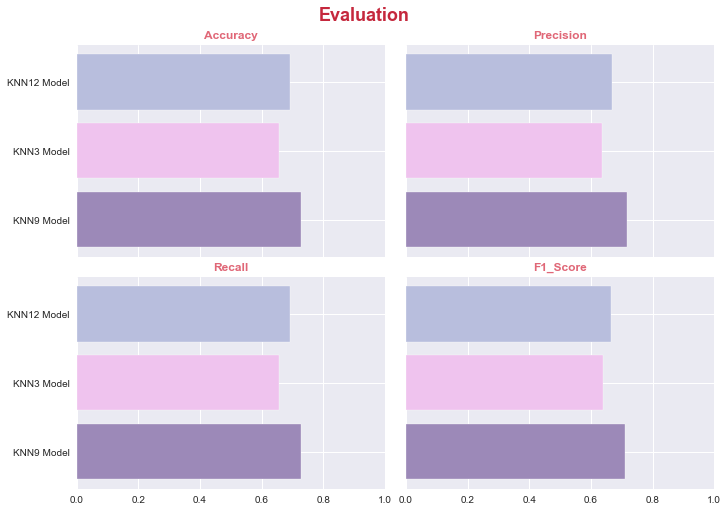

In [31]:
plot_models(eval_knn)

From the above scores we can see that KNN12 has been performing well enough.

### Question-6: Plot the visualizations for the models.

plot_decision_regions function for plotting decision regions of classifiers in or 2 dimensions. Since we have 7 dimensions, we can only plot for at most 2 dimensions at a time so we will be using attributes feature_index, filler_feature_ranges and filler_feature_values to compensate.

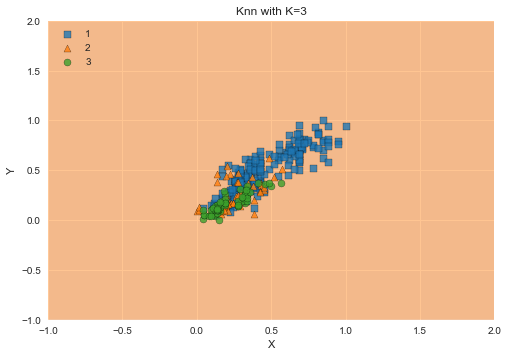

In [32]:
value=4
width=4
plot_decision_regions(np.array(X), np.array(y), clf=knn3, legend=2, feature_index=[3,4],
                      filler_feature_values={6: value, 1:value, 2:value, 5:value, 0: value}, 
                      filler_feature_ranges={6: width, 1: width, 2: width, 5: width,0: width})

#Adding axes annotations
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Knn with K='+ str(3))
plt.show()

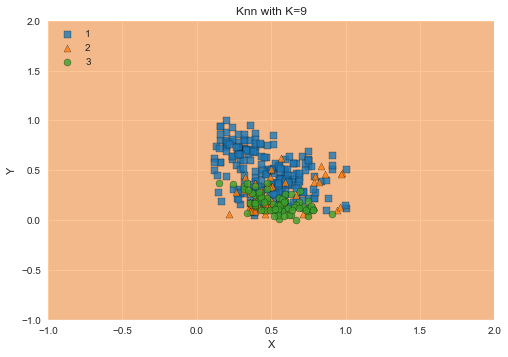

In [33]:
value=4
width=4
plot_decision_regions(np.array(X), np.array(y), clf=knn9, legend=2, feature_index=[5,4],
                      filler_feature_values={6: value, 1:value, 2:value, 3:value, 0: value}, 
                      filler_feature_ranges={6: width, 1: width, 2: width, 3: width,0: width})

#Adding axes annotations
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Knn with K='+ str(9))
plt.show()

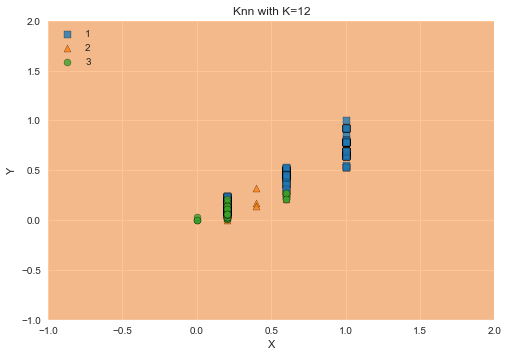

In [34]:
value=4
width=4
plot_decision_regions(np.array(X), np.array(y), clf=knn12, legend=2, feature_index=[1,2],
                      filler_feature_values={6: value, 3:value, 4:value, 5:value, 0: value}, 
                      filler_feature_ranges={6: width, 3: width, 4: width, 5: width,0: width})

#Adding axes annotations
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Knn with K='+ str(12))
plt.show()